## Regularization in Logistic Regression

In this notebook we will see the application of various regularization methods (like: L1, L2, and ElasticNet) applied to Logistic Regression and compare their performances along with Unregularized Logistic Regression."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Create synthetic classification dataset

We will create a synthetic dataset for this notebook using the `make_classification` method in `sklearn.datasets`. 

This synthetic dataset will contain
- Total 6 features 
- Out of which 3 features are informative and 1 feature is redundant and rest 2 features are 'useless' feature or 'noise'
- Target is binary (0 or 1)


In [2]:
X, y = make_classification(n_samples=1000,          # number of data points in the dataset
                           n_features=6,            # number of features / independent variables
                           n_classes=2,             # number of classes in the dataset
                           n_clusters_per_class=1,  # number of cluster in each class
                           n_informative=3,         # number of informative features
                           n_redundant=1,           # number of redundant features
                           n_repeated=0,            # number of repeated features
                           class_sep=1.2,             # Larger values spread out the clusters/classes.
                           shuffle=True)            # whether to shuffle the dataset

In [3]:
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

dataset = pd.DataFrame(np.hstack((X, y.reshape(-1,1))), columns= feature_names + ['target'])

dataset.head(10)

,x1,x2,x3,x4,x5,x6,target
0,-0.820036,-1.031850,1.254646,0.403883,0.597961,-1.327375,1.0
1,-0.962817,-1.741664,1.775993,-0.499838,1.584775,-2.115377,1.0
2,1.356476,-1.550069,1.553108,1.676900,1.206980,-0.156751,1.0
3,0.310402,-0.502638,1.099967,0.218081,-0.825646,1.192492,0.0
4,-0.331234,-0.860458,1.261687,-0.829490,0.424800,-3.170666,1.0
5,0.522201,-1.931554,2.053120,1.006852,0.906602,2.502913,0.0
6,2.225150,-2.828923,2.836304,0.089148,2.477773,-2.196936,1.0
7,-0.514508,-0.019970,1.617128,-1.310862,-2.794645,0.241951,0.0
8,-0.793181,0.449397,-0.311943,-0.687319,-0.806818,1.532995,0.0
9,0.034217,-0.050453,0.507440,-0.787210,-1.031377,1.897009,0.0


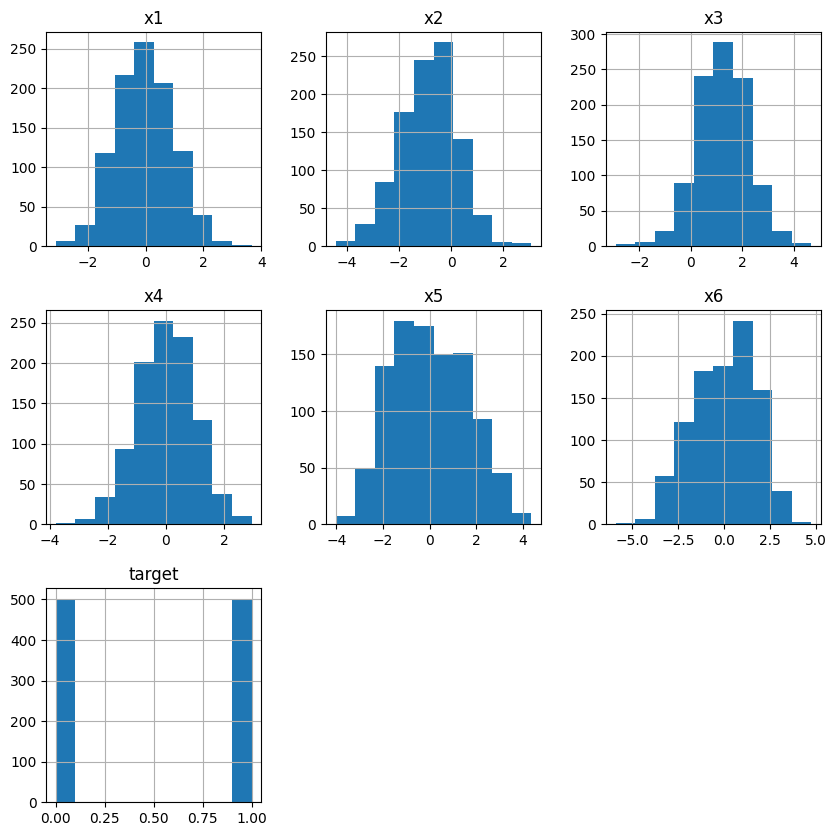

In [4]:
dataset.hist(figsize=(10,10));

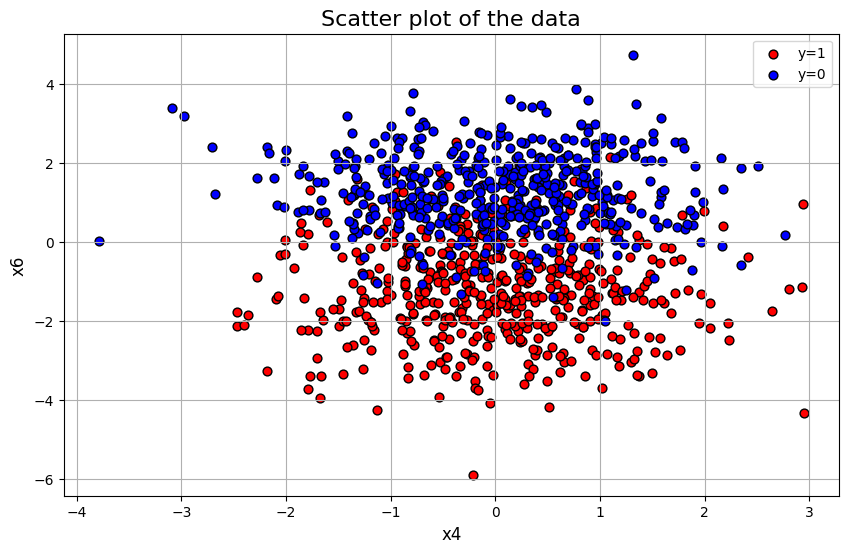

In [5]:
plt.figure(figsize=(10,6))
data_1 = dataset[dataset['target']==1]
data_0 = dataset[dataset['target']==0]

feature1 = 'x4'
feature2 = 'x6'
plt.scatter(x=data_1[feature1].values, y=data_1[feature2].values, s=40, c='r', edgecolor='k', label="y=1")
plt.scatter(x=data_0[feature1].values, y=data_0[feature2].values, s=40, c='b', edgecolor='k', label="y=0")
plt.title("Scatter plot of the data",fontsize=16)
plt.xlabel(f"{feature1}", fontsize=12)
plt.ylabel(f"{feature2}", fontsize=12)
plt.grid()
plt.legend()
plt.show()

### Feature transformation

First we will split the data into train and test and then perform `MinMaxScaler()` on all the numerical features. [We can also use `StandardScaler()`]

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

(800, 6) (200, 6)


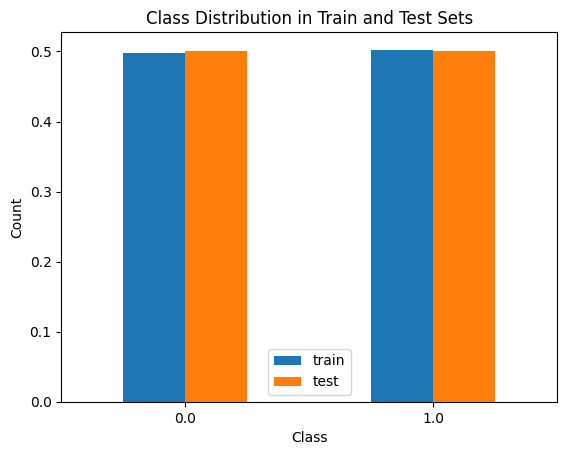

In [7]:
X = dataset.drop('target', axis=1)
y = dataset['target'].values.flatten()

# Create train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, test_size=0.2, stratify=y    # startified based on target variable, so that the distribution of the target variable is same in train and test dataset
)

print(X_train.shape, X_test.shape)

# Check the distribution of target variable in train and test dataset 
# This is to check the distribution of target variable is similar

pd.DataFrame({'train': pd.Series(y_train).value_counts(normalize=True),
              'test': pd.Series(y_test).value_counts(normalize=True)}).plot(kind='bar')
plt.title('Class Distribution in Train and Test Sets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
numerical_cols = feature_names

preprocessor = ColumnTransformer(
    transformers=[
        ("min-max-scaling", MinMaxScaler(), numerical_cols)    # apply min-max scaling to the numerical columns
    ]
)

preprocessor

,transformers,"[('min-max-scaling', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [9]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train[0]

array([0.24643728, 0.58473173, 0.35328244, 0.78462724, 0.53187982,
       0.51465402])

### Modelling

In this notebook our objective is to 

- See how the unregularized logistic regression performs on the test-dataset and compute the absolute values of the coefficients (model weights) of unregularized logistic regression.
- Then apply L2, L1, and ElasticNet regularization one by one and observe the model performance in each cases. We will also compute the absolute values of the coefficients (model weights) of different methods.
- Finally we will compare the coefficients of different methods.

### Unregularized Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
# defining the model
lr_unreg = LogisticRegression(penalty=None, max_iter=1000)

# fitting / training the model
lr_unreg.fit(X_train, y_train)

# predicting on test dataset
y_pred_test = lr_unreg.predict(X_test)

In [12]:
# Performance on test dataset

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       100
         1.0       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



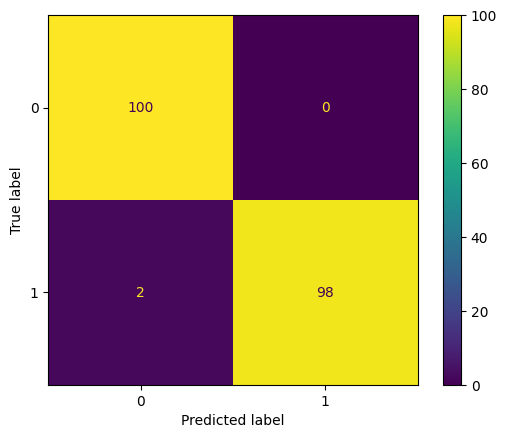

In [13]:
cm_test = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm_test).plot();

In [14]:
# Coefficients / model weights / parameters

coefficients_unreg = [abs(x.item()) for x in lr_unreg.coef_.flatten()]

coefficient_dict_unreg = dict(zip(feature_names, coefficients_unreg))

coefficient_dict_unreg_sorted = dict(sorted(coefficient_dict_unreg.items(), key=lambda item: item[1], reverse=True))

coefficient_dict_unreg_sorted

{'x5': 31.64669117488419,
 'x6': 24.037428911920493,
 'x3': 17.321455634176953,
 'x2': 6.198300658023734,
 'x4': 3.089338908457319,
 'x1': 0.8472139853074341}

### L2-regularized Logistic Regression

In [15]:
# defining the model
lr_l2_reg = LogisticRegression(penalty='l2', C=1.5, max_iter=1000)  # C is the inverse of regularization strength

# fitting / training the model
lr_l2_reg.fit(X_train, y_train)

# predicting on test dataset
y_pred_test = lr_l2_reg.predict(X_test)

In [16]:
# Perfromance on test dataset

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       100
         1.0       1.00      0.94      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



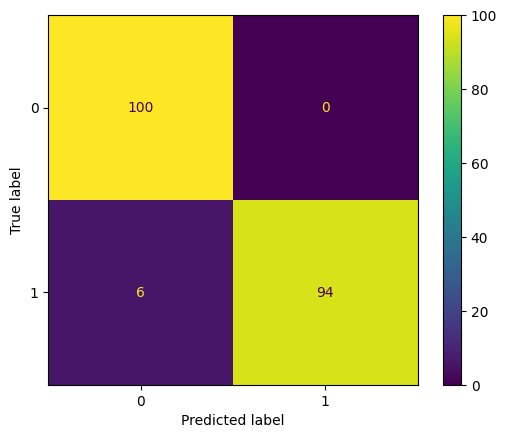

In [17]:
cm_test = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm_test).plot();

In [18]:
# Coefficients / model weights / parameters

coefficients_l2 = [abs(x.item()) for x in lr_l2_reg.coef_.flatten()]

coefficient_dict_l2 = dict(zip(feature_names, coefficients_l2))

coefficient_dict_l2_sorted = dict(sorted(coefficient_dict_l2.items(), key=lambda item: item[1], reverse=True))

coefficient_dict_l2_sorted

{'x6': 9.485600771883464,
 'x5': 9.44457979500884,
 'x3': 4.223799776944587,
 'x2': 0.5910952213197475,
 'x4': 0.37380723023420165,
 'x1': 0.06567727233853342}

### L1-regularized Logistic Regression

In [19]:
# defining the model
# C is the inverse of regularization strength
# default solver 'lbfgs' doesn't support l1 regularization, hence using 'liblinear' as solver
lr_l1_reg = LogisticRegression(penalty='l1', C=4.0, max_iter=1000, solver='liblinear')   

# fitting / training the model
lr_l1_reg.fit(X_train, y_train)

# predicting on test dataset
y_pred_test = lr_l1_reg.predict(X_test)

In [20]:
# Performance on test dataset

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       100
         1.0       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



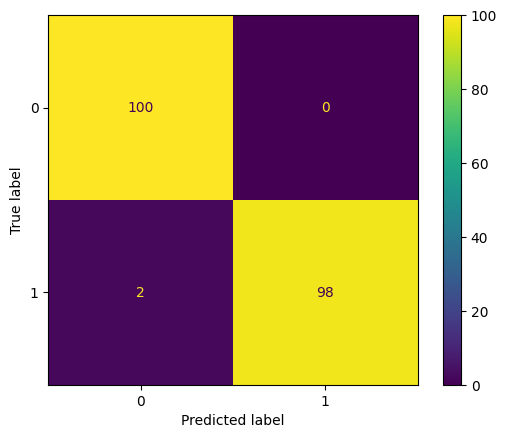

In [21]:
cm_test = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm_test).plot();

In [22]:
# Coefficients / model weights / parameters

coefficients_l1 = [abs(x.item()) for x in lr_l1_reg.coef_.flatten()]

coefficient_dict_l1 = dict(zip(feature_names, coefficients_l1))

coefficient_dict_l1_sorted = dict(sorted(coefficient_dict_l1.items(), key=lambda item: item[1], reverse=True))

coefficient_dict_l1_sorted

{'x5': 26.854944074084386,
 'x6': 19.742270382255732,
 'x3': 9.898632650002265,
 'x2': 7.916005240607964,
 'x4': 1.0565825933397015,
 'x1': 0.0}

### ElasticNet-Regularized Logistic Regression

In [23]:
# defining the model
# C is the inverse of regularization strength
# Only the solver 'saga' support elasticnet regularization in logistic regression
lr_elasticnet_reg = LogisticRegression(penalty='elasticnet', C=3.0, l1_ratio=0.5, max_iter=1000, solver='saga')   

# fitting / training the model
lr_elasticnet_reg.fit(X_train, y_train)

# predicting on test dataset
y_pred_test = lr_elasticnet_reg.predict(X_test)

In [24]:
# Measuring performance on test dataset

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       100
         1.0       1.00      0.97      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



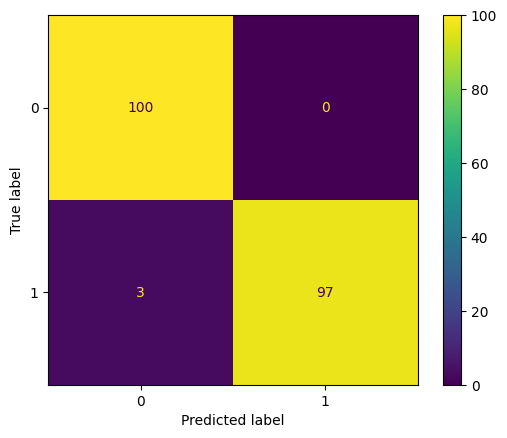

In [25]:
cm_test = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm_test).plot();

In [26]:
# Coefficients / model weights / parameters

coefficients_elasticnet = [abs(x.item()) for x in lr_elasticnet_reg.coef_.flatten()]

coefficient_dict_elasticnet = dict(zip(feature_names, coefficients_elasticnet))

coefficient_dict_elasticnet_sorted = dict(sorted(coefficient_dict_elasticnet.items(), key=lambda item: item[1], reverse=True))

coefficient_dict_elasticnet_sorted

{'x5': 13.925988200095707,
 'x6': 13.451657778925531,
 'x3': 7.029568562574425,
 'x4': 0.5974405412406119,
 'x1': 0.08221770154786079,
 'x2': 0.0}

### Comparing the coefficients (model weights) in different methods

In [27]:
coefficient_dataframe = pd.DataFrame([coefficient_dict_unreg_sorted, 
                                      coefficient_dict_l2_sorted,
                                      coefficient_dict_l1_sorted,
                                      coefficient_dict_elasticnet_sorted], 
                                      index=['Unregularized', 'L2-regularized', 'L1-regularized', 'ElasticNet']).T

coefficient_dataframe

,Unregularized,L2-regularized,L1-regularized,ElasticNet
x5,31.646691,9.444580,26.854944,13.925988
x6,24.037429,9.485601,19.742270,13.451658
x3,17.321456,4.223800,9.898633,7.029569
x2,6.198301,0.591095,7.916005,0.000000
x4,3.089339,0.373807,1.056583,0.597441
x1,0.847214,0.065677,0.000000,0.082218


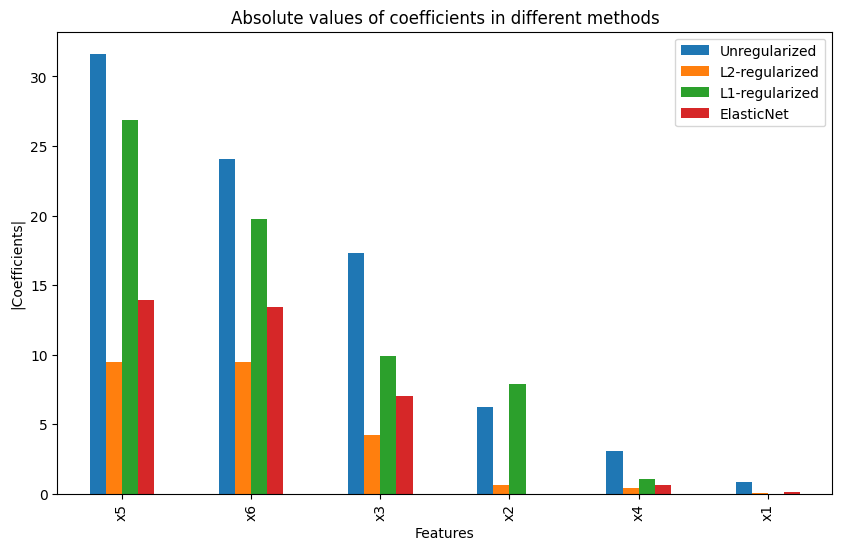

In [28]:
coefficient_dataframe.plot(kind='bar', figsize=(10,6), 
                           title="Absolute values of coefficients in different methods", 
                           xlabel="Features", ylabel="|Coefficients|")
plt.legend()
plt.show()

We can see that the performance of all the models are comparable. However, L1-regularization and ElasticNet forced some coefficients to be zero. Thereby doing feature-selection in the process.